In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [75]:
car=pd.read_csv('Car_cleaned.csv')

In [76]:
car.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


Text(0.5, 1.0, 'Year vs Price')

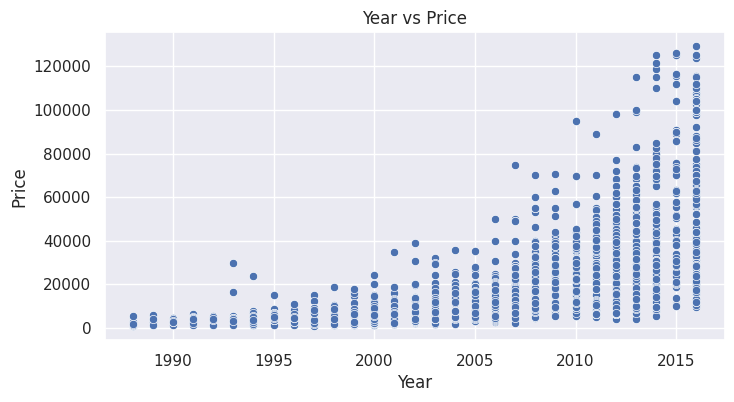

In [77]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=car['Year'],y=car['Price'])
plt.title('Year vs Price')

Text(0.5, 1.0, 'EngineV vs Price')

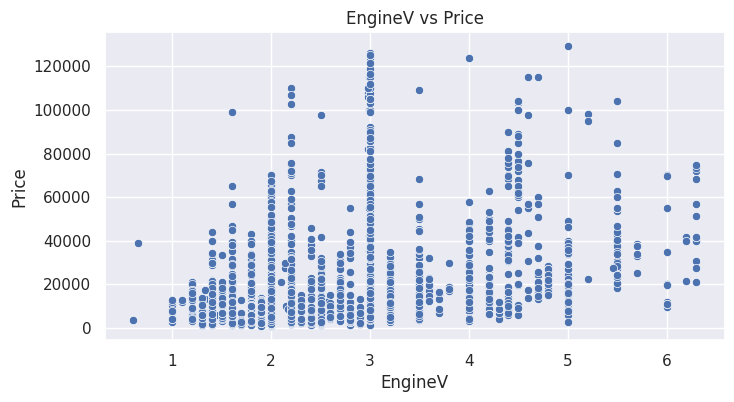

In [78]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=car['EngineV'],y=car['Price'])
plt.title('EngineV vs Price')

Text(0.5, 1.0, 'Mileage vs Price')

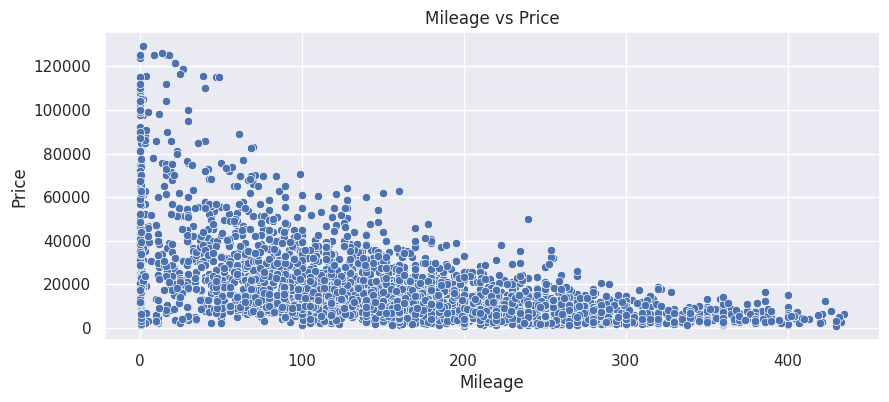

In [79]:
plt.figure(figsize=(10,4))
sns.scatterplot(x=car['Mileage'],y=car['Price'])
plt.title('Mileage vs Price')

Text(0.5, 1.0, 'Price')

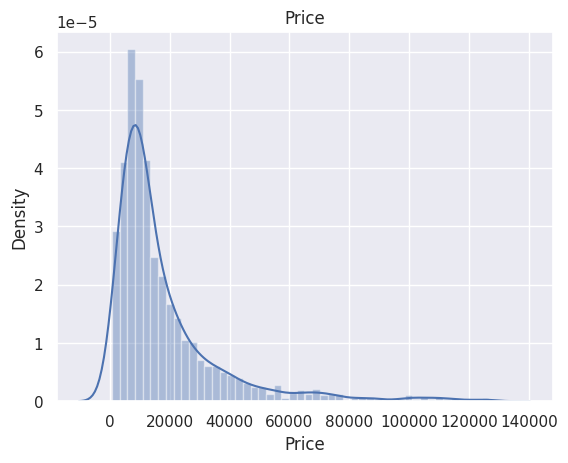

In [80]:
sns.distplot(car['Price'])
plt.title('Price')

In [81]:
log_price=np.log(car['Price'])
car['log_price']=log_price

In [82]:
car.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


Text(0.5, 1.0, 'Year vs log_price')

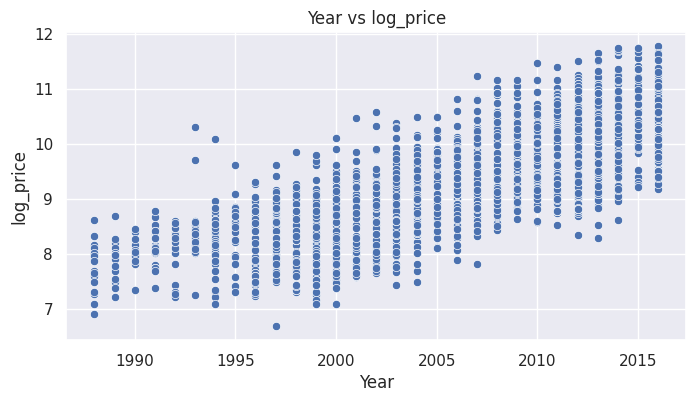

In [64]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=car['Year'],y=car['log_price'])
plt.title('Year vs log_price')

Text(0.5, 1.0, 'EngineV vs log_price')

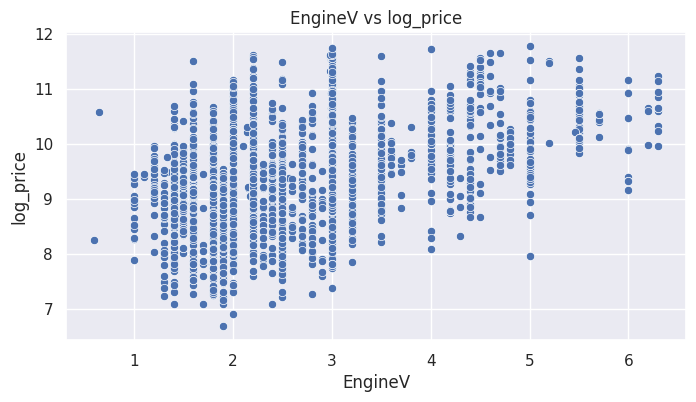

In [65]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=car['EngineV'],y=car['log_price'])
plt.title('EngineV vs log_price')

Text(0.5, 1.0, 'Mileage vs log_price')

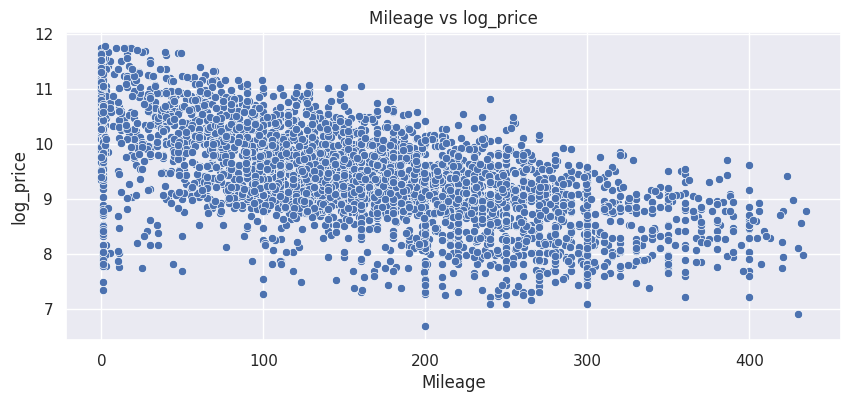

In [83]:
plt.figure(figsize=(10,4))
sns.scatterplot(x=car['Mileage'],y=car['log_price'])
plt.title('Mileage vs log_price')

In [84]:
car.drop('Price',axis=1,inplace=True)

### Check MultiColinearity

In [85]:
car.columns

Index(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration',
       'Year', 'log_price'],
      dtype='object')

In [87]:
# Assumption : new car less milage
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

var = car[['Mileage','Year','EngineV']]

vif_df = pd.DataFrame()
vif_df['Vif'] = [vif(var.values ,i ) for i in range(var.shape[1])] 
vif_df['features'] = var.columns


In [88]:
vif_df

,Vif,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [89]:
car.drop('Year',axis=1,inplace=True)

In [90]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3867 entries, 0 to 3866
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         3867 non-null   object 
 1   Body          3867 non-null   object 
 2   Mileage       3867 non-null   int64  
 3   EngineV       3867 non-null   float64
 4   Engine Type   3867 non-null   object 
 5   Registration  3867 non-null   object 
 6   log_price     3867 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 211.6+ KB


In [91]:
car.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


In [92]:
car_dum=pd.get_dummies(car,drop_first=True)
car_dum

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [97]:
vif_df_all = pd.DataFrame()
vif_df_all['Vif'] = [vif(car_dum.values ,i ) for i in range(car_dum.shape[1])] 
vif_df_all['features'] = car_dum.columns

vif_df_all

,Vif,features
0,4.460434,Mileage
1,13.445639,EngineV
2,41.981260,log_price
3,2.603990,Brand_BMW
4,3.084356,Brand_Mercedes-Benz
5,1.830297,Brand_Mitsubishi
6,2.281498,Brand_Renault
7,2.406546,Brand_Toyota
8,3.312814,Brand_Volkswagen
9,1.583516,Body_hatch


In [98]:
car_dum.columns

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [99]:
car_dum.to_csv('Car_preprocessed.csv',index=False)